In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("results50000long408t414.csv", low_memory=False, lineterminator='\n')

In [3]:
df_clean = df[['userid', 'username', 'usercreatedts', 'totaltweets', 'following', 'followers',      # user
               'tweetid', 'text', 'hashtags', 'retweetcount', 'is_retweet', 'original_tweet_id',    # tweet info
               'original_tweet_userid', 'in_reply_to_user_id', 'in_reply_to_status_id',             # tweet network info
               'TOXICITY', 'SEVERE_TOXICITY', 'THREAT', 'PROFANITY', 'IDENTITY_ATTACK', 'INSULT']]  # perspective scores

df_clean.head(10)

,userid,username,usercreatedts,totaltweets,following,followers,tweetid,text,hashtags,retweetcount,...,original_tweet_id,original_tweet_userid,in_reply_to_user_id,in_reply_to_status_id,TOXICITY,SEVERE_TOXICITY,THREAT,PROFANITY,IDENTITY_ATTACK,INSULT
0,993127212810489856,RomanMoskal70,2018-05-06 13:55:53,111304,63,2432,1645781322970075136,@Eudgen2 війни будуть не залежно від наших баж...,[],0,...,0,0,1087761995439525888,1645780994740584448,NaN,NaN,NaN,NaN,NaN,NaN
1,1630078764464975874,AsadElhasi90,2023-02-27 05:34:04,6622,80,11,1646996698395230209,Update from Ukraine | Major Ukrainian Attack o...,"[{'text': 'Canada', 'indices': [98, 105]}, {'t...",0,...,0,0,0,0,0.072128,0.004463,0.034422,0.014088,0.041777,0.016785
2,3823392983,fgafatg,2015-09-30 10:46:38,127199,3626,3889,1646008872509865984,Here are today's control-of-terrain maps of #R...,"[{'text': 'Russia', 'indices': [44, 51]}, {'te...",76,...,1645912622510817280,71298686,0,0,0.087956,0.004635,0.024753,0.023311,0.048738,0.019870
3,845225862,jpeter1son,2012-09-25 10:02:32,16091,4053,3513,1646462925492613121,⚡️ WAR IN #UKRAINE - APR 13\n\nAverage troop l...,"[{'text': 'UKRAINE', 'indices': [10, 18]}]",5,...,1646441213736759296,1482945426,0,0,0.012755,0.001125,0.007508,0.011356,0.004125,0.006553
4,1641117312219586564,DavidSt80377567,2023-03-29 16:37:59,2448,341,68,1645788927205466120,@vicktop55 #USA &amp; its #NATO allies have re...,"[{'text': 'USA', 'indices': [11, 15]}, {'text'...",5,...,1645713331838238720,356816693,0,0,0.351861,0.007896,0.011586,0.098996,0.063859,0.338892
5,1617983384852090882,Hi45733134,2023-01-24 20:31:26,14823,2,11,1646430040253407232,Ukraine War: Dead bodies stretchered out of Ir...,"[{'text': 'Canada', 'indices': [50, 57]}, {'te...",0,...,0,0,0,0,0.096118,0.008888,0.085497,0.027820,0.051581,0.025671
6,1493586495667687424,CTcoins_,2022-02-15 14:03:12,808,165,10,1645000649757655041,To @elonmusk\n\n1. Is this a violation of TOS ...,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t...",5014,...,1644860903261720576,866652464774361088,0,0,0.113677,0.004807,0.026307,0.016889,0.055673,0.029273
7,868512251300507649,ArnoldNetakoy,2017-05-27 17:00:31,41159,31,157,1645112625221476356,"One of the most dangerous places in #Ukraine, ...","[{'text': 'Ukraine', 'indices': [36, 44]}, {'t...",29,...,1644815281078796288,140496030,0,0,0.044884,0.002441,0.023717,0.012073,0.013747,0.012263
8,245914702,aeroscouting,2011-02-01 18:51:16,8975,857,1446,1644914415152791553,08 April 2023\nUnknown location in #Ukraine\n\...,"[{'text': 'Ukraine', 'indices': [34, 42]}]",51,...,1644890845311582208,1379186582486388736,0,0,0.011812,0.000854,0.006991,0.010126,0.003552,0.007684
9,1477391786146512900,WStreetholics,2022-01-01 21:30:34,295,168,30,1646090189301751810,#Oil nears highest level since Jan on slowing ...,"[{'text': 'Oil', 'indices': [0, 4]}, {'text': ...",0,...,0,0,0,0,0.015770,0.001140,0.007664,0.014567,0.004088,0.008083


In [4]:
# get followers / following average of toxic users and non-toxic users

toxic_threshold = 0.5

df_toxic = df_clean[df_clean['TOXICITY'] >= toxic_threshold]
df_nontoxic = df_clean[df_clean['TOXICITY'] <= toxic_threshold]

toxic_followers_avg = df_toxic['followers'].mean().round().astype(int)
toxic_following_avg = df_toxic['following'].mean().round().astype(int)
nontoxic_followers_avg = df_nontoxic['followers'].mean().round().astype(int)
nontoxic_following_avg = df_nontoxic['following'].mean().round().astype(int)

print(f"{toxic_followers_avg = }")
print(f"{toxic_following_avg = }")
print(f"{nontoxic_followers_avg = }")
print(f"{nontoxic_following_avg = }")

toxic_followers_avg = 1656
toxic_following_avg = 1525
nontoxic_followers_avg = 13496
nontoxic_following_avg = 1902


In [5]:
# get followers / following average of SEVERELY toxic users and non-toxic users

toxic_threshold = 0.5

df_toxic = df_clean[df_clean['SEVERE_TOXICITY'] >= toxic_threshold]
df_nontoxic = df_clean[df_clean['SEVERE_TOXICITY'] <= toxic_threshold]

toxic_followers_avg = df_toxic['followers'].mean().round().astype(int)
toxic_following_avg = df_toxic['following'].mean().round().astype(int)
nontoxic_followers_avg = df_nontoxic['followers'].mean().round().astype(int)
nontoxic_following_avg = df_nontoxic['following'].mean().round().astype(int)

print(f"{toxic_followers_avg = }")
print(f"{toxic_following_avg = }")
print(f"{nontoxic_followers_avg = }")
print(f"{nontoxic_following_avg = }")

toxic_followers_avg = 1297
toxic_following_avg = 1154
nontoxic_followers_avg = 13093
nontoxic_following_avg = 1898


In [6]:
# get count of hateful tweets by user

toxic_threshold = 0.5

df_toxic = df_clean[df_clean['TOXICITY'] >= toxic_threshold]

df_toxic_count = df_toxic.value_counts(['userid', 'username']).reset_index()
df_toxic_count.columns = ['userid', 'username', 'count']

repeat_toxic_user = df_toxic_count[df_toxic_count['count'] > 3]
first_toxic_user_count = len(df_toxic_count[df_toxic_count['count'] == 1])

# df_toxic_count.head(10)
print(f"{first_toxic_user_count = }")
repeat_toxic_user.head(10)

first_toxic_user_count = 1885


,userid,username,count
0,1499763123603050497,FuckPutinBot,197
1,596502612,kiketo79,18
2,1563796301854265345,lexoid2,14
3,1114913449,RiccardoG_Laura,13
4,883906002,mweiss_tue,9
5,1500778582179819520,PutinToHell1,6
6,1557048342131113985,VidarOlerud,5
7,1500754473190309888,OKaidanovska,5
8,1441050120552914946,tomevolucion,5
9,1605219961550643202,killrussianrats,4


In [7]:
# convert the above to csv

# repeat_toxic_user.to_csv('repeat_toxic_user.csv')

In [8]:
# get totaltweets average of toxic users and non-toxic users

toxic_threshold = 0.5

df_toxic = df_clean[df_clean['TOXICITY'] >= toxic_threshold]
df_nontoxic = df_clean[df_clean['TOXICITY'] <= toxic_threshold]

toxic_totaltweets_avg = df_toxic['totaltweets'].mean().round().astype(int)
nontoxic_totaltweets_avg = df_nontoxic['totaltweets'].mean().round().astype(int)

print(f"{toxic_totaltweets_avg = }")
print(f"{nontoxic_totaltweets_avg = }")

toxic_totaltweets_avg = 96565
nontoxic_totaltweets_avg = 77337


In [9]:
# get number of toxic tweets that are retweets

toxic_threshold = 0.5

df_toxic = df_clean[df_clean['TOXICITY'] >= toxic_threshold]
df_nontoxic = df_clean[df_clean['TOXICITY'] <= toxic_threshold]

toxic_retweets = df_toxic[df_toxic['is_retweet'] == True]['is_retweet'].count()
toxic_not_retweets = df_toxic[df_toxic['is_retweet'] == False]['is_retweet'].count()

print(f"{toxic_retweets = }")
print(f"{toxic_not_retweets = }")

toxic_retweets = 1557
toxic_not_retweets = 983


In [10]:
# maybe get number of toxic tweets that are replies?

In [11]:
# maybe get number of retweets for toxic tweet and non-toxic tweets?

In [12]:
# maybe get account creation date timeline for toxic and non-toxic users?

In [13]:
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

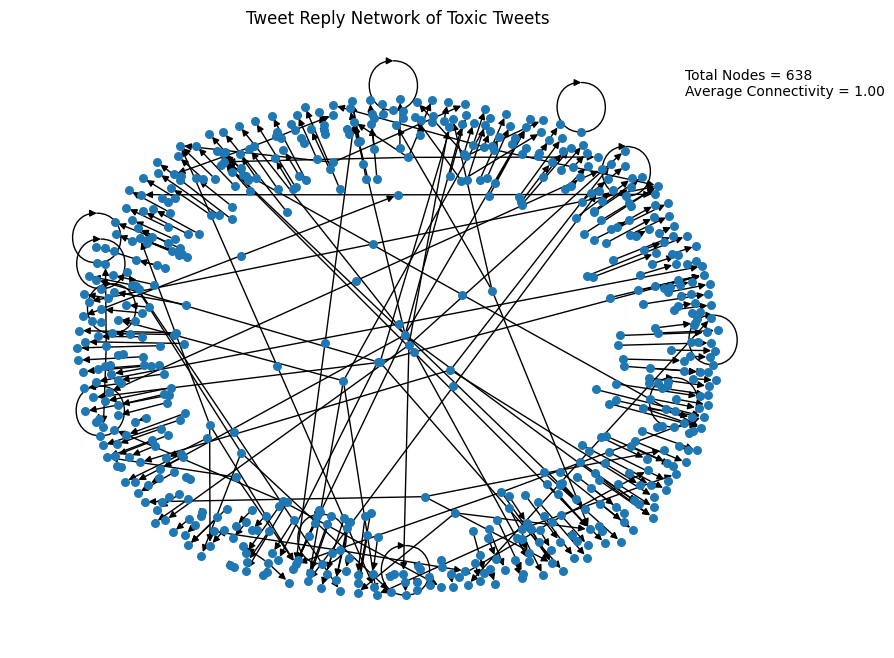

In [14]:
# get network graph of toxic tweet replies

df_tweets = df[['userid', 'username', 'tweetid', 'text', 'original_tweet_id', 'original_tweet_userid',
                'in_reply_to_user_id', 'in_reply_to_status_id', 'TOXICITY']]

toxic_threshold = 0.5
df_toxic = df_tweets[df_tweets['TOXICITY'] >= toxic_threshold].head(7000)
df_toxic_tweets = df_toxic[['userid', 'in_reply_to_user_id']]

G = nx.from_pandas_edgelist(df_toxic_tweets, 'userid', 'in_reply_to_user_id', create_using=nx.DiGraph())
G.remove_node(0)


G.remove_nodes_from(list(nx.isolates(G)))

total_nodes = len(G)
avg_connectivity = nx.average_degree_connectivity(G)[1]

plt.figure(figsize=(10,8))  
plt.title("Tweet Reply Network of Toxic Tweets")
plt.figtext(.8, .8, f"Total Nodes = {total_nodes}\nAverage Connectivity = {avg_connectivity:.2f}")
pos = nx.spring_layout(G, seed=4321)
nx.draw(G, pos=pos, node_size=30)
plt.show()

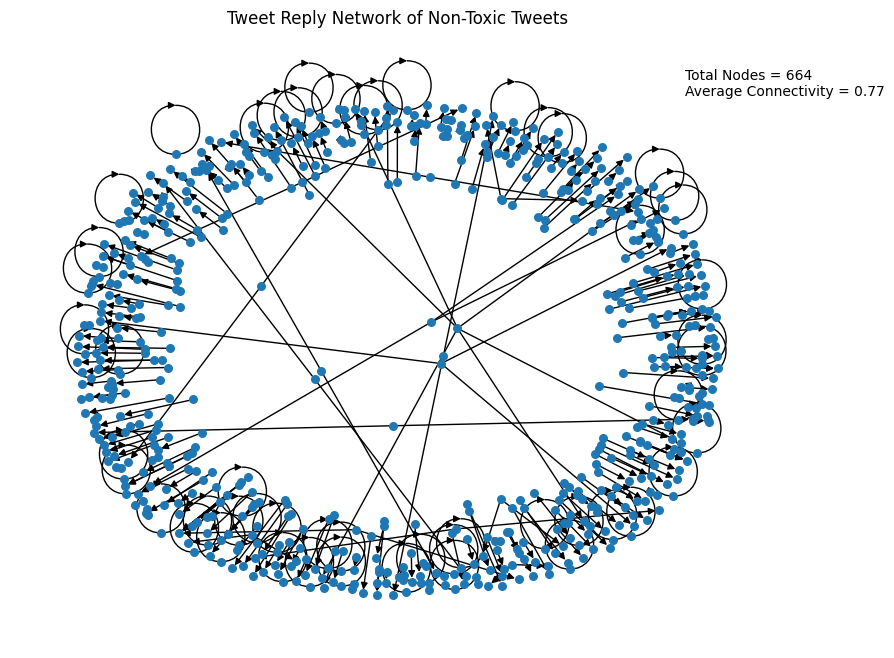

In [15]:
# get network graph of non-toxic tweet replies

df_tweets = df[['userid', 'username', 'tweetid', 'text', 'original_tweet_id', 'original_tweet_userid',
                'in_reply_to_user_id', 'in_reply_to_status_id', 'TOXICITY']]

toxic_threshold = 0.5
df_nontoxic = df_tweets[df_clean['TOXICITY'] <= toxic_threshold].head(7000)
df_nontoxic_tweets = df_nontoxic[['userid', 'in_reply_to_user_id']]

G = nx.from_pandas_edgelist(df_nontoxic_tweets, 'userid', 'in_reply_to_user_id', create_using=nx.DiGraph())
G.remove_node(0)


G.remove_nodes_from(list(nx.isolates(G)))

total_nodes = len(G)
avg_connectivity = nx.average_degree_connectivity(G)[1]

plt.figure(figsize=(10,8))  
plt.title("Tweet Reply Network of Non-Toxic Tweets")
plt.figtext(.8, .8, f"Total Nodes = {total_nodes}\nAverage Connectivity = {avg_connectivity:.2f}")
pos = nx.spring_layout(G, seed=4321)
nx.draw(G, pos=pos, node_size=30)
plt.show()

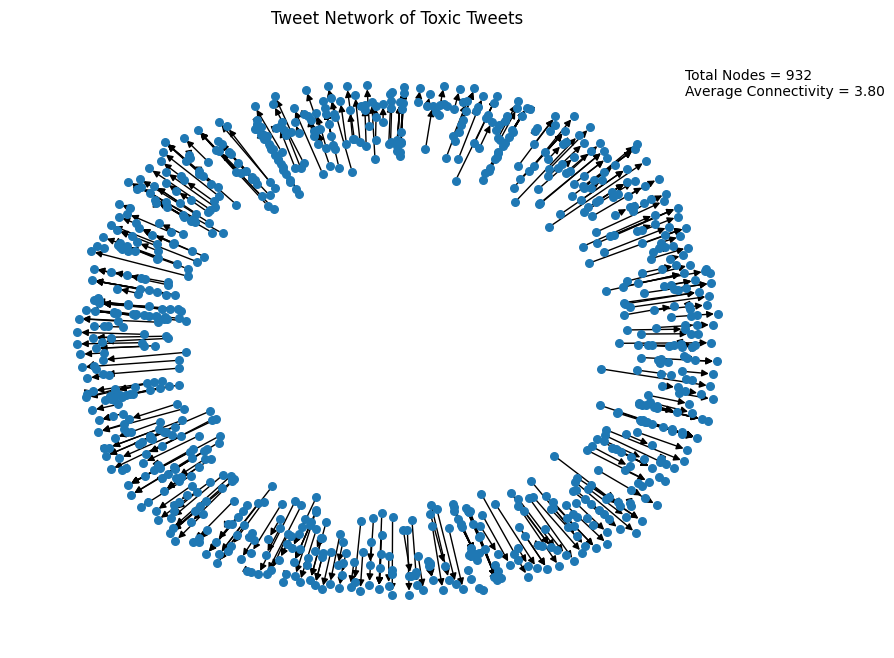

In [16]:
# get network graph of toxic tweet replies

df_tweets = df[['userid', 'username', 'tweetid', 'text', 'original_tweet_id', 'original_tweet_userid',
                'in_reply_to_user_id', 'in_reply_to_status_id', 'TOXICITY']]

toxic_threshold = 0.5
df_toxic = df_tweets[df_tweets['TOXICITY'] >= toxic_threshold].head(1000)
df_toxic_tweets = df_toxic[['tweetid', 'original_tweet_id']]

G = nx.from_pandas_edgelist(df_toxic_tweets, 'tweetid', 'original_tweet_id', create_using=nx.DiGraph())
G.remove_node(0)


G.remove_nodes_from(list(nx.isolates(G)))

total_nodes = len(G)
avg_connectivity = nx.average_degree_connectivity(G)[1]

plt.figure(figsize=(10,8))  
plt.title("Tweet Network of Toxic Tweets")
plt.figtext(.8, .8, f"Total Nodes = {total_nodes}\nAverage Connectivity = {avg_connectivity:.2f}")
pos = nx.spring_layout(G, seed=4321)
nx.draw(G, pos=pos, node_size=30)
plt.show()

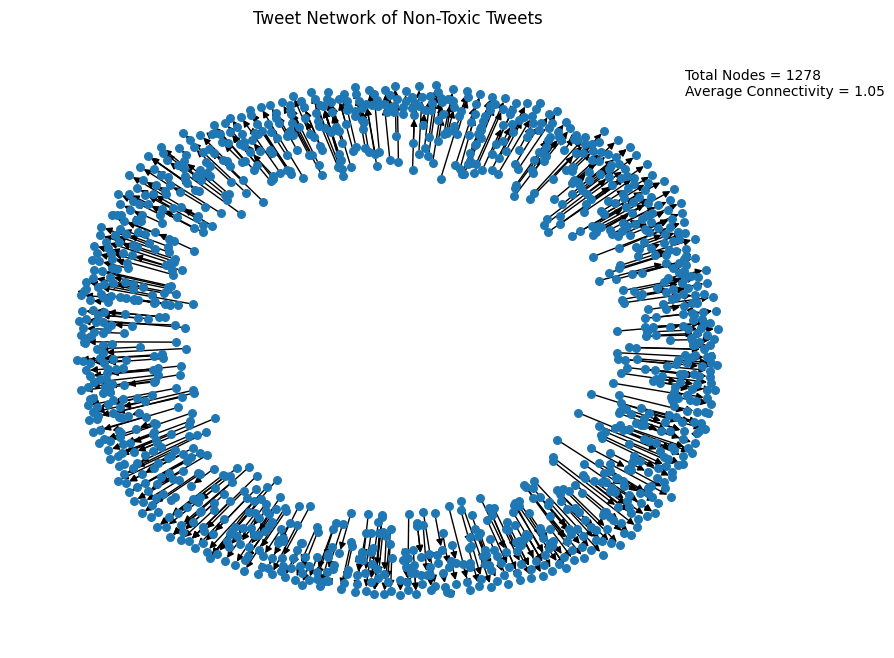

In [17]:
# get network graph of non-toxic tweet replies

df_tweets = df[['userid', 'username', 'tweetid', 'text', 'original_tweet_id', 'original_tweet_userid',
                'in_reply_to_user_id', 'in_reply_to_status_id', 'TOXICITY']]

toxic_threshold = 0.5
df_nontoxic = df_tweets[df_clean['TOXICITY'] <= toxic_threshold].head(1000)
df_nontoxic_tweets = df_nontoxic[['tweetid', 'original_tweet_id']]

G = nx.from_pandas_edgelist(df_nontoxic_tweets, 'tweetid', 'original_tweet_id', create_using=nx.DiGraph())
G.remove_node(0)


G.remove_nodes_from(list(nx.isolates(G)))

total_nodes = len(G)
avg_connectivity = nx.average_degree_connectivity(G)[1]

plt.figure(figsize=(10,8))  
plt.title("Tweet Network of Non-Toxic Tweets")
plt.figtext(.8, .8, f"Total Nodes = {total_nodes}\nAverage Connectivity = {avg_connectivity:.2f}")
pos = nx.spring_layout(G, seed=4321)
nx.draw(G, pos=pos, node_size=30)
plt.show()